In [8]:
# -*- encoding:urf-8 -*-
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table like and matrices
import pandas as pd
import numpy as np

# Modeling Helper
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# Configure visualization
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

poi_path = '../../UAI_data/input/poi_re.csv'
train_Aug_path = '../../UAI_data/input/train_Aug_re.csv'
train_Jul_path = '../../UAI_data/input/train_July_re.csv'
weather_path = '../../UAI_data/input/weather.csv'
test_path = '../../UAI_data/input/test.csv'

poi = pd.read_csv(poi_path,encoding='gbk')
train_aug = pd.read_csv(train_Aug_path,encoding='gbk')
train_jul = pd.read_csv(train_Jul_path,encoding='gbk')
weather = pd.read_csv(weather_path)
test = pd.read_csv(test_path,encoding='gbk')

### Helper Function

In [37]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [9]:
test.sort_values(['create_date','create_hour'])

,test_id,create_date,create_hour,start_geo_id_new,end_geo_id_new
277,277,2017-08-01,1,5,22
308,308,2017-08-01,1,24,251
311,311,2017-08-01,1,24,29
436,436,2017-08-01,1,47,110
443,443,2017-08-01,1,16,27
450,450,2017-08-01,1,24,63
452,452,2017-08-01,1,57,85
506,506,2017-08-01,1,69,60
515,515,2017-08-01,1,99,3
531,531,2017-08-01,1,88,58


In [10]:
train_jul

,create_date,create_hour,status,estimate_money,estimate_distance,estimate_term,driver_id,member_id,start_geo_id,end_geo_id,id
0,2017-07-01,0,2,140.00,20099.0,18.0,0,0,5,0,0
1,2017-07-01,0,2,78.00,9000.0,18.0,1,1,22,1,1
2,2017-07-01,0,1,86.23,10323.0,20.0,2,2,39,2,2
3,2017-07-01,0,1,81.88,14197.0,27.0,3,3,55,3,3
4,2017-07-01,2,1,217.01,39150.0,40.0,2,4,195,4,4
5,2017-07-01,2,1,55.69,8360.0,16.0,4,5,22,1,5
6,2017-07-01,6,2,188.00,40184.0,47.0,5,6,206,5,6
7,2017-07-01,8,2,56.00,10953.0,21.0,6,7,55,6,7
8,2017-07-01,9,2,25.00,2889.0,5.0,7,8,68,7,8
9,2017-07-01,9,2,31.00,4415.0,8.0,8,9,63,8,9


In [30]:
coord_jul = train_jul.groupby(['create_date','create_hour','start_geo_id','end_geo_id'],as_index=False)['start_geo_id'].agg({'demand_count':'count'})
# coord['count'].value_counts()
coord_jul.to_csv('../../UAI_data/input/tain_jul_demand.csv',index=False)
coord_jul

,create_date,create_hour,start_geo_id,end_geo_id,demand_count
0,2017-07-01,0,0,10,1
1,2017-07-01,0,0,21,1
2,2017-07-01,0,0,64,1
3,2017-07-01,0,1,1,2
4,2017-07-01,0,1,15,2
5,2017-07-01,0,1,37,1
6,2017-07-01,0,1,39,2
7,2017-07-01,0,1,89,2
8,2017-07-01,0,1,95,1
9,2017-07-01,0,1,160,2


In [26]:
coord_aug = train_aug.groupby(['create_date','create_hour','start_geo_id','end_geo_id'],as_index=False)['start_geo_id'].agg({'demand_count':'count'})
# coord['count'].value_counts()
coord_aug.to_csv('../../UAI_data/input/tain_aug_demand.csv',index=False)
coord_aug

,create_date,create_hour,start_geo_id,end_geo_id,demand_count
0,2017-08-01,0,1,1,1
1,2017-08-01,0,1,9,1
2,2017-08-01,0,1,41,1
3,2017-08-01,0,1,73,1
4,2017-08-01,0,1,101,1
5,2017-08-01,0,1,191,1
6,2017-08-01,0,1,198,1
7,2017-08-01,0,3,56,1
8,2017-08-01,0,5,1,1
9,2017-08-01,0,5,5,3


In [24]:
poi

,gas_station_num,supermarket_num,residence_num,metro_num,bus_station_num,caffe_num,restaurant_num,ATM_num,office_building_num,hotel_num,location_id
0,0,0,1,0,2,0,0,0,0,0,220
1,4,43,151,4,36,22,597,59,47,45,79
2,0,0,0,0,0,0,0,0,0,0,897
3,4,32,50,3,22,6,509,20,9,27,107
4,0,3,1,0,6,0,6,0,0,1,624
5,0,0,0,0,0,0,0,0,0,0,763
6,2,30,151,3,28,19,513,39,55,80,33
7,0,0,0,0,0,0,0,0,0,0,869
8,9,34,170,4,45,20,779,69,66,116,3
9,0,0,0,0,0,0,0,0,0,0,803


### missing information

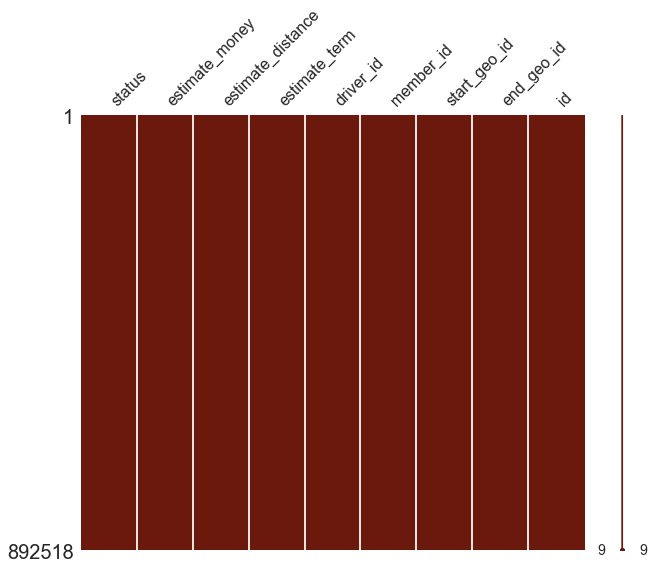

In [21]:
msno.matrix(df=train_jul.iloc[:,2:11], figsize=(10, 8), color=(0.42, 0.1, 0.05))

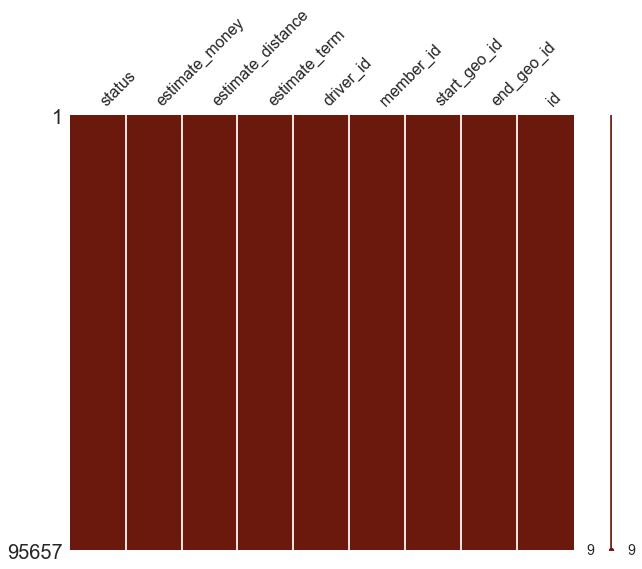

In [15]:
msno.matrix(df=train_aug.iloc[:,2:11], figsize=(10, 8), color=(0.42, 0.1, 0.05))

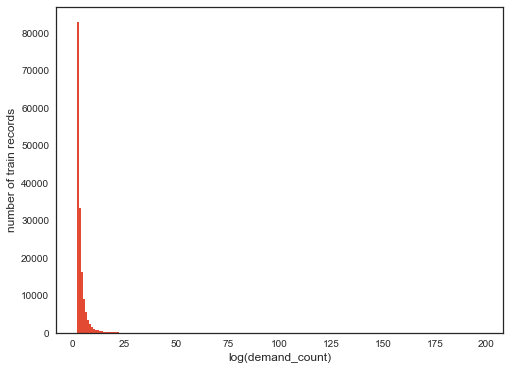

In [53]:
# coord_jul['log_demand_count'] = np.log(coord_jul['demand_count'].values + 1)
t = coord_jul[coord_jul['demand_count'] > 1]
plt.hist(t['demand_count'].values, bins=200)
plt.xlabel('log(demand_count)')
plt.ylabel('number of train records')
plt.show()


In [35]:
describe_more(coord_jul)

,Datatype,Levels,Variable
1,int64,24,create_hour
0,object,31,create_date
4,int64,85,demand_count
2,int64,862,start_geo_id
3,int64,1070,end_geo_id


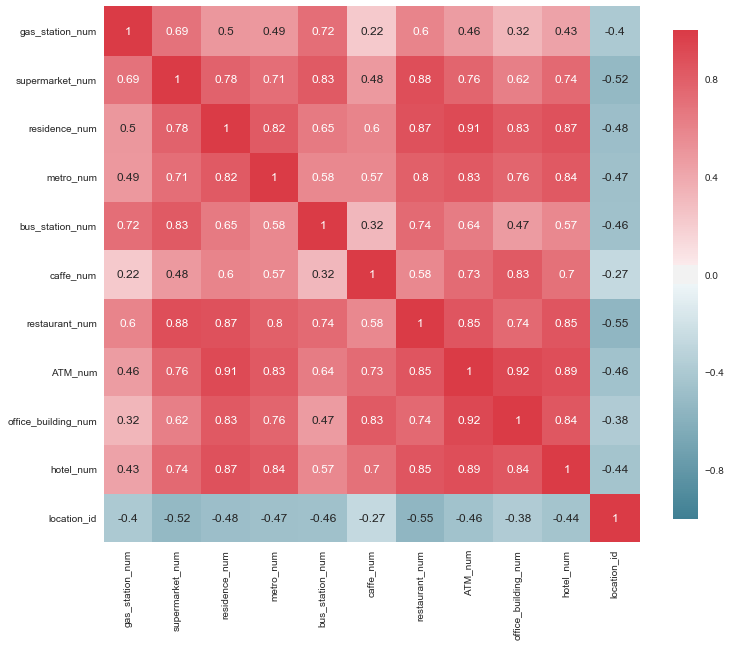

In [39]:
plot_correlation_map(poi)

In [46]:
corr = poi.corr()
corr.to_csv('../../UAI_data/input/poi_correlation.csv')

In [73]:
poi_t = poi.copy()
poi_t = poi_t.reset_index('location_id')
poi_t

,index,gas_station_num,supermarket_num,residence_num,metro_num,bus_station_num,caffe_num,restaurant_num,ATM_num,office_building_num,hotel_num,location_id
0,0,0,0,1,0,2,0,0,0,0,0,220
1,1,4,43,151,4,36,22,597,59,47,45,79
2,2,0,0,0,0,0,0,0,0,0,0,897
3,3,4,32,50,3,22,6,509,20,9,27,107
4,4,0,3,1,0,6,0,6,0,0,1,624
5,5,0,0,0,0,0,0,0,0,0,0,763
6,6,2,30,151,3,28,19,513,39,55,80,33
7,7,0,0,0,0,0,0,0,0,0,0,869
8,8,9,34,170,4,45,20,779,69,66,116,3
9,9,0,0,0,0,0,0,0,0,0,0,803


In [87]:
poi_pivot = pd.pivot_table(poi_t,index='location_id')
poi_pivot.iloc[0].values
mat = poi_pivot.as_matrix()
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=4, init='k-means++')
pred = cls.fit_predict(mat)
pred

array([1, 3, 3, ..., 0, 2, 0])

In [83]:
poi_pivot

,ATM_num,bus_station_num,caffe_num,gas_station_num,hotel_num,index,metro_num,office_building_num,residence_num,restaurant_num,supermarket_num
location_id,,,,,,,,,,,
0,4,20,1,4,10,867,1,11,51,74,7
1,62,43,33,2,84,956,3,64,180,900,62
2,47,31,4,6,68,644,6,18,117,732,34
3,69,45,20,9,116,8,4,66,170,779,34
4,21,122,7,7,75,125,1,27,76,893,69
5,27,17,12,1,38,933,1,6,23,69,7
6,136,40,102,4,279,541,6,162,233,900,61
7,9,53,1,1,6,1102,0,3,18,51,11
8,40,26,20,6,24,433,2,42,60,362,25


In [101]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(mat))[:500000]
kmeans = MiniBatchKMeans(n_clusters=6, batch_size=10000).fit(mat[sample_ind])
pred = kmeans.predict(mat)
location_cls = pd.DataFrame({'location_id':np.arange(len(pred)),'cluster':pred})
location_cls = location_cls[['location_id','cluster']]
location_cls.to_csv('../../UAI_data/input/location_cls.csv',index=False)
location_cls = pd.read_csv('../../UAI_data/input/location_cls.csv')
location_cls

,location_id,cluster
0,0,2
1,1,1
2,2,1
3,3,5
4,4,5
5,5,4
6,6,5
7,7,4
8,8,0
9,9,5


In [103]:
train_jul.sort_values(by=['create_date','create_hour','start_geo_id','end_geo_id'])

,create_date,create_hour,status,estimate_money,estimate_distance,estimate_term,driver_id,member_id,start_geo_id,end_geo_id,id
23337,2017-07-01,0,2,101.00,14431.0,24.0,4059,19742,0,10,23337
294668,2017-07-01,0,2,39.00,4905.0,9.0,1369,115113,0,21,294666
834610,2017-07-01,0,0,78.86,8764.0,9.0,2,179948,0,64,834606
535663,2017-07-01,0,2,25.00,1654.0,3.0,498,21788,1,1,535660
811217,2017-07-01,0,2,32.00,3220.0,6.0,1983,51009,1,1,811213
445198,2017-07-01,0,2,73.00,12254.0,24.0,3368,140216,1,15,445195
869139,2017-07-01,0,2,61.00,9656.0,19.0,1985,182643,1,15,869135
233366,2017-07-01,0,2,63.00,10010.0,20.0,324,94908,1,37,233364
6572,2017-07-01,0,1,67.41,11493.0,18.0,768,6206,1,39,6572
113479,2017-07-01,0,1,66.81,11493.0,17.0,13,6206,1,39,113478


In [104]:
train_aug['create_date'].unique()

array([u'2017-08-01', u'2017-08-02', u'2017-08-03', u'2017-08-04',
       u'2017-08-05', u'2017-08-06', u'2017-08-07'], dtype=object)

In [110]:
train_jul[train_jul['driver_id'] == 2]['estimate_term'].sum() / (60.0 * 24)

3914.9571527777775

In [106]:
train_jul['member_id'].value_counts()

2         450
2525      412
369       225
5181      207
2621      199
622       169
12487     160
990       156
13732     152
73        148
1805      143
12518     142
2730      142
7732      140
7115      136
3950      131
5965      130
3734      128
960       126
9994      124
377       124
7246      122
6324      122
12196     120
12303     119
5056      117
191       117
953       116
1940      116
5282      116
         ... 
168668      1
170717      1
151813      1
153860      1
23685       1
160448      1
106365      1
108410      1
118647      1
11403       1
116598      1
120692      1
178905      1
176856      1
182999      1
180950      1
133839      1
131790      1
143625      1
139978      1
146121      1
144072      1
141578      1
148166      1
154309      1
152260      1
158403      1
156354      1
135437      1
2047        1
Name: member_id, dtype: int64

In [111]:
train_jul['driver_id'].value_counts()

2       284104
1650       461
1174       455
182        446
2593       424
838        422
1307       421
1068       415
1694       414
1664       412
199        412
290        405
1123       404
155        398
259        395
2604       389
545        387
596        385
901        381
2129       380
1143       380
175        379
498        378
1137       377
52         377
657        374
705        374
423        373
150        373
45         372
         ...  
6160         1
6218         1
6213         1
6050         1
5860         1
5861         1
1097         1
6176         1
5649         1
4842         1
6161         1
5933         1
5936         1
6099         1
6181         1
5671         1
6042         1
5590         1
5849         1
6043         1
6097         1
5937         1
6212         1
5854         1
5725         1
6096         1
6182         1
5855         1
5017         1
5992         1
Name: driver_id, dtype: int64

In [112]:
train_jul.shape[0]

892518

In [113]:
train_aug['driver_id'].value_counts()

2       29743
5889       60
2593       59
1657       58
274        58
1664       56
324        54
1650       53
673        53
250        53
259        53
1165       53
1692       51
2529       51
1197       51
417        51
470        51
1373       50
3018       50
1337       50
52         50
1847       50
714        49
471        49
450        49
405        49
2656       49
1307       49
545        48
266        48
        ...  
1610        1
3531        1
6385        1
6513        1
4848        1
5064        1
2955        1
3402        1
3530        1
4978        1
5390        1
4239        1
141         1
3981        1
4079        1
2222        1
6444        1
6508        1
4461        1
4781        1
2609        1
3630        1
3758        1
4878        1
1839        1
240         1
6451        1
6515        1
4238        1
0           1
Name: driver_id, dtype: int64